Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [684]:
from random import choices
import random
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

import lab9_lib

## Evolution Strategy

Meaning the functions to apply an evolutionary algorithm to the problem.

In [685]:
# Generale Parameters
N_LOCI = 1000           # number of loci in the chromosome
POPULATION_SIZE = 4     #number of parents from which we generate offspring
OFFSPRING_SIZE = 6      #number of offspring generated from parents
GENETIC_OPS_PROB_SELECTION = 0.5 # probability of selecting a specific genetic operator

# Recombination parameters
RECOMBINATION_SLICE_SIZE = 500 # size of the first slice of the parent chromosome to be swapped with the other parent 

# Mutation parameters
MUTATION_SLICE_SIZE = 200 # number of bits to mutate



### Parent selection

In [686]:
def parent_selection(population):
    pop = population.copy()
    prob = random.random()
    random.shuffle(pop)
    pop = sorted(pop, key = lambda x: x[1]) if prob > 0.5 else pop
    return (pop[0], pop[1])

### Recombination

In [687]:
def recombine(parent1, parent2):
    return (
        parent1[:RECOMBINATION_SLICE_SIZE] + parent2[RECOMBINATION_SLICE_SIZE:],
        parent2[:RECOMBINATION_SLICE_SIZE] + parent1[RECOMBINATION_SLICE_SIZE:]
    )

### Mutation

In [688]:
def mutate(parent):
    offspring = parent.copy()
    random_gene_indexes = random.sample(range(0, N_LOCI), MUTATION_SLICE_SIZE)
    for g in random_gene_indexes:
        offspring[g] = 1 - offspring[g]
    return offspring

### Wrap function

In [689]:
def generate_individuals(population):
    """
    Generate individuals for the simulation.

    :return: A list of individuals.
    """
    individuals = []
    while len(individuals) < OFFSPRING_SIZE:
        parents = parent_selection(population)
        if random.random() > GENETIC_OPS_PROB_SELECTION:
            new_offs = recombine(parents[0][0], parents[1][0])
        else: 
            new_offs = (mutate(parents[0][0]), mutate(parents[1][0]))
        individuals.append(new_offs[0])
        individuals.append(new_offs[1])

    return individuals

### Survival selection

In [690]:
def natural_selection(population):
    """
    Perform natural selection on the population using a 'plus' strategy

    :return: The population after natural selection.
    """
    return sorted(population, key=lambda x: x[1], reverse=True)[:POPULATION_SIZE]

## Problem instances

In [691]:
def solve_problem(problem_instance):
    history = []
    fitness = lab9_lib.make_problem(problem_instance)

    population = []
    for _ in range(POPULATION_SIZE):
        individual = [random.randint(0, 1) for _ in range(N_LOCI)]
        population.append((individual, fitness(individual)))
        
    best_individual = population[0]

    for _ in range(100):
        offsprings = generate_individuals(population)
        population += [(individual, fitness(individual)) for individual in offsprings]
        history.append(population)
        population = natural_selection(population)
        best_individual = population[0]
        
    print(best_individual[1])
    print(fitness.calls)
    return history

### Plot

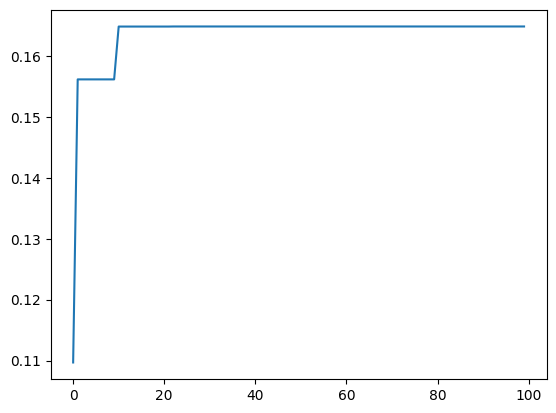

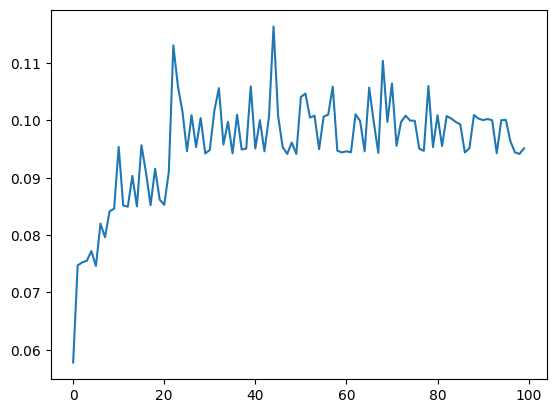

In [692]:
avgs =[]
for gen in history:        
        sum = 0
        for el in gen:
                sum += el[1]
        avg = sum/len(gen)
        avgs.append(avg)

maxs = []
for gen in history:        
        max = 0
        for el in gen:
                max = el[1] if el[1] > max else max
        maxs.append(max)

plt.plot(range(len(maxs)), maxs)
plt.show()
plt.plot(range(len(avgs)), avgs)
plt.show()

## Main

In [693]:
history = solve_problem(10)


0.1707056695
604
